In [1]:
import os
import torch
import warnings
import numpy as np
import pandas as pd
import torch.nn as nn
from skimage import feature
from skimage import io as IO
from skimage import io, color
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
from skimage.feature import hog
import torch.nn.functional as F
import torch.optim as OPTIMIZER
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import torchvision.models as models
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split as TRAIN_TEST_SPLIT

C:\Users\zaraar\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Reading the Dataset from the directory

In [2]:
train_images=[]
test_images=[]
path_fire="Datasets 1-2/Training/fire/"
path_nofire="Datasets 1-2/Training/noFire/"
path_fired3="Dataset 3/Train/Fire/"
path_nofired3="Dataset 3/Train/Neutral/"

test_fire="Validation/Fire/"
test_nofire="Validation/noFire/"
for i in os.listdir("Datasets 1-2/Training/fire")+os.listdir("Datasets 1-2/Training/noFire"):
    if i[0]=="f":
        train_images.append((path_fire+i,1))
    elif i[0]=="n":
        train_images.append((path_nofire+i,0))
        
for i in os.listdir("Dataset 3/Train/Fire"):
        train_images.append((path_fired3+i,1))                   
for i in os.listdir("Dataset 3/Train/Neutral"):
        train_images.append((path_nofired3+i,1))
        
for i in os.listdir(test_fire):
    test_images.append((test_fire+i,1))
for i in os.listdir(test_nofire):
    test_images.append((test_nofire+i,0))

# Displaying Some Item from the Dataset

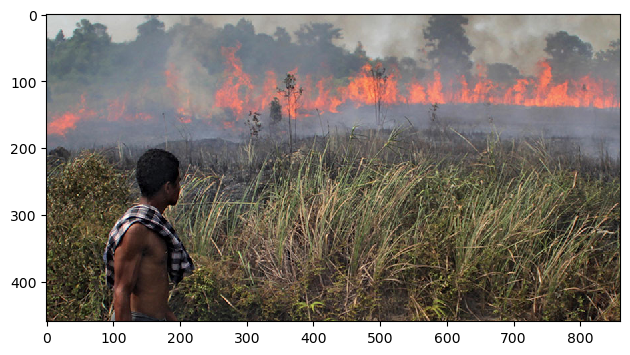

In [12]:
image=io.imread(train_images[0][0])
io.imshow(image)
plt.show()

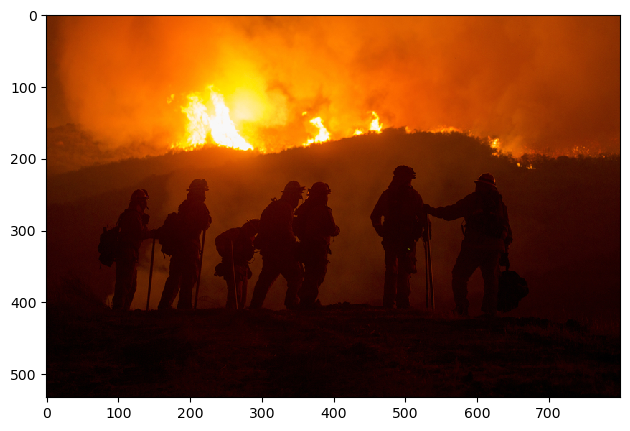

In [11]:
image=io.imread(test_images[79][0])
io.imshow(image)
plt.show()

# EXTRACTING TRAINING DATA FEATURES

In [48]:
TRAIN=[]
radius = 5  
n_points = 8  * radius 
for i in range(DATA.shape[0]):
    IMAGE = io.imread(DATA.iloc[i][0],as_gray=True)
    IMAGE=np.resize(IMAGE,(64,64))

    HF = hog(IMAGE, orientations=8, pixels_per_cell=(8, 8),cells_per_block=(1, 1))
    HF = HF.astype(np.float32)

    HISTOGRAM, _ = np.histogram(IMAGE, bins=256, range=(0, 1))
    HISTOGRAM = HISTOGRAM / HISTOGRAM.sum()
    HISTOGRAM = HISTOGRAM.astype(np.float32)

    IMAGE=IMAGE.astype(np.int64)

    lbp_features= feature.local_binary_pattern(IMAGE, n_points, radius, method='uniform')
    HIST_LBP_F, _ = np.histogram(lbp_features.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    HIST_LBP_F = HIST_LBP_F.astype("float")
    HIST_LBP_F /= (HIST_LBP_F.sum() + 1e-7)
    HIST_LBP_F=HIST_LBP_F.astype(np.float32)

    TRAIN.append((HF,HISTOGRAM,HIST_LBP_F,DATA.iloc[i][1]))      

# EXTRACTING TESTING DATA FEATURES

In [49]:
TEST=[]
for i in range(test.shape[0]):
    IMAGE = io.imread(test.iloc[i][0],as_gray=True)
    IMAGE=np.resize(IMAGE,(64,64))
    
    HF = hog(IMAGE, orientations=8, pixels_per_cell=(8, 8),cells_per_block=(1, 1))
    HF = HF.astype(np.float32)

    HISTOGRAM, _ = np.histogram(IMAGE, bins=256, range=(0, 1))
    HISTOGRAM = HISTOGRAM / HISTOGRAM.sum()
    HISTOGRAM = HISTOGRAM.astype(np.float32)

    IMAGE=IMAGE.astype(np.int64)

    lbp_features= feature.local_binary_pattern(IMAGE, n_points, radius, method='uniform')
    HIST_LBP_F, _ = np.histogram(lbp_features.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    HIST_LBP_F = HIST_LBP_F.astype("float")
    HIST_LBP_F /= (HIST_LBP_F.sum() + 1e-7)
    HIST_LBP_F=HIST_LBP_F.astype(np.float32)


    TEST.append((HF,HISTOGRAM,HIST_LBP_F,test.iloc[i][1])) 

# Displaying Training and Testing Data

In [50]:
Train_dataframe=pd.DataFrame(TRAIN,columns=["HOG-FEATURES",'HISTOGRAM-FEATURES','LBP-FEATURES','LABLES'])
Train_dataframe.head()

,HOG-FEATURES,HISTOGRAM-FEATURES,LBP-FEATURES,LABLES
0,"[0.03350291, 0.014666969, 0.09439586, 0.703204...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1,"[0.14808376, 0.0, 0.0, 0.6978203, 0.6978203, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0026855469, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",1
2,"[0.10917574, 0.164472, 0.068224385, 0.6879398,...","[0.31933594, 0.03955078, 0.015625, 0.001953125...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
3,"[0.035122212, 0.011507875, 0.041453682, 0.7043...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
4,"[0.57668823, 0.0, 0.04721662, 0.57668823, 0.57...","[0.0, 0.0, 0.0, 0.00024414062, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


In [51]:
Test_dataframe=pd.DataFrame(TEST,columns=["HOG-FEATURES",'HISTOGRAM-FEATURES','LBP-FEATURES','LABLES'])
Test_dataframe.head()

,HOG-FEATURES,HISTOGRAM-FEATURES,LBP-FEATURES,LABLES
0,"[0.0011896078, 0.07810941, 0.33352074, 0.66432...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.00024414062, 0.000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1,"[0.0, 0.34954512, 0.0, 0.66250217, 0.66250217,...","[0.0036621094, 0.25073242, 0.0, 0.0007324219, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
2,"[0.055778645, 0.2818018, 0.12313413, 0.5245702...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
3,"[0.6760952, 0.15631188, 0.18362193, 0.0, 0.676...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
4,"[0.18679653, 0.0, 0.0, 0.0, 0.9823986, 0.0, 0....","[0.22070312, 0.17578125, 0.3017578, 0.00146484...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


# Creation of Custom Dataset Class

In [52]:
class CUSTOMDATASET(Dataset):
    def __init__(self,FRAME):
        self.Frame=FRAME
        
    def __len__(self):
        return len(self.Frame)
    
    def __getitem__(self,idx):
        HOG,HIST,LBP,label=self.Frame.iloc[idx]
        HOG=torch.tensor(HOG)
        HIST=torch.tensor(HIST)
        LBP=torch.tensor(LBP)
        
        FULL_FEATURE=torch.concat([HOG,HIST,LBP],axis=0)
        LABEL_TENSOR=torch.tensor(label,dtype=torch.float32)

        return FULL_FEATURE,LABEL_TENSOR

# Loading Custom Dataset for Training and Testing Dataset

In [53]:
TRAINING_DATA=CUSTOMDATASET(Train_dataframe)
TESTING_DATA=CUSTOMDATASET(Test_dataframe)

# Creating Training and Testing Dataloaders

In [54]:
TRAIN_LOADER=DataLoader(dataset=TRAINING_DATA,batch_size=128,shuffle=True)
TEST_LOADER=DataLoader(dataset=TESTING_DATA,batch_size=128,shuffle=False)

# Creation of Custom Neural Network

In [55]:
class IMAGE_CLASSIFICATION_MODEL(nn.Module):
    def __init__(self):
        super(IMAGE_CLASSIFICATION_MODEL, self).__init__()
        
        self.relu=nn.ReLU()
        self.sig=nn.Sigmoid()
        self.L1=nn.Linear(810,512)
        self.L2=nn.Linear(512,256)
        self.L3=nn.Linear(256,128)
        self.L4=nn.Linear(128,33)
        self.L5=nn.Linear(33,1)
        
    def forward(self,x):
        
        x=self.L1(x)
        x=self.relu(x)
        
        x=self.L2(x)
        x=self.relu(x)
        
        x=self.L3(x)
        x=self.relu(x)
        
        x=self.L4(x)
        x=self.relu(x)
        
        x=self.L5(x)
        x=self.sig(x)
        return x

# Creation of Loss , Optimizer and Model Objects

In [60]:
MODEL=IMAGE_CLASSIFICATION_MODEL()
LOSS=nn.BCELoss()
OPTIM=OPTIMIZER.Adam(MODEL.parameters(),lr=0.001)

# Training the Neural Network

In [3]:
epochs=10
n_batch_loss=[]
F_EPOCH=0
for epoch in range(epochs):
    running_loss = 0.0
    total_train = 0
    correct_train = 0
    for i, batch in enumerate(TRAIN_LOADER):
        features,labels = batch
        
        OPTIM.zero_grad()
        
        outputs = MODEL(features)
        
        labels = labels.unsqueeze(1)
        labels=labels.float()
       
        loss = LOSS(outputs,labels)

        loss.backward()
        OPTIM.step()
        
        running_loss += loss.item()
        outputs=torch.round(outputs)

        correct_train=correct_train + torch.eq(outputs,labels).sum()
        total_train=total_train+labels.size(0)
        running_loss+=loss.item()
    F_EPOCH=epoch
print(F_EPOCH," :",round(correct_train.item()/total_train*100,1),"\n")

epoch : 10 
Train accuracy :  94.3 



# Testing the Neural Network

In [4]:
predicted_labels=[]
true_labels=[]
MODEL.eval()
with torch.no_grad():
    running_loss=0
    correct_train=0
    total_train=0
    for i,batch in enumerate(TEST_LOADER):
            z,labels = batch  
            z=z.squeeze(1)
            outputs = MODEL(z)

            labels = labels.unsqueeze(1)
            labels=labels.float()

            loss = LOSS(outputs,labels)


            running_loss += loss.item()

            total_train+=labels.size(0)
            outputs=torch.round(outputs)

            predicted_labels.append(outputs)
            true_labels.append(labels)
            
            correct_train=correct_train + torch.eq(outputs,labels).sum()
            running_loss+=loss.item()
print('test accuracy : ',round(correct_train.item()/total_train*100,1))

test accuracy : 91.7
